Introduction to Artificial Intelligence - TP2 - April 19th 2018 
--

At the end of this session, you will be able to : 
- Perform basic unsupervised learning tasks using sklearn
- Apply unsupervised learning on PyRat datasets 

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,MiniBatchDictionaryLearning,DictionaryLearning

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)


# Digits dataset

For this TP we are going to be using the DIGITS dataset. The first thing we are going to do is load the dataset. 

As this is <b>unsupervised</b> we will mostly ignore y (it will only be used for visualization).

Load the model

In [5]:
x_digits,y_digits = load_digits(n_class=10,return_X_y=True)
print(x_digits.shape)

(1797, 64)


Visualize some examples

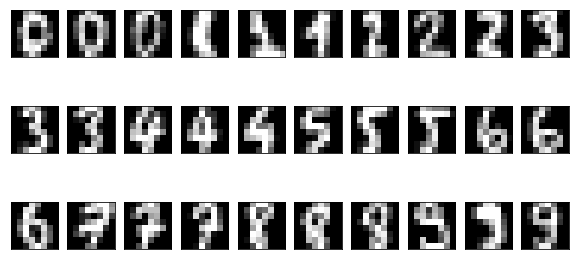

In [3]:
fig = plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(3,10,3*i+1)
    
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.subplot(3,10,3*i+2)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(3,10,3*i+3)
    #pick a random digit in the current category     
    curX = x_digits[y_digits==i]    
    r=np.random.randint(curX.shape[0])
    curim = curX[r,:].reshape((8,8))
    
    plt.imshow(curim,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])    

Split the dataset

# K-means
Using sklearn we are going to perform K-means clustering with $10$ clusters. As we did in the last TP we will instantiate an object of the class [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), with n_clusters=10 and random_state=0(so that you results are consistent with ours).

You then should fit the model to the training data (without passing the y as this is a nonsupervised model).

In [7]:
### CELL TO COMPLETE, create object kmeans from class KMeans
KMean_classifier = KMeans(n_clusters=10, random_state=0)
KMean_classifier.fit(x_digits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Now we are going to visualize the centroids of the $10$ clusters. First we have to get the center of each cluster. 

This will be done by using the attribute cluster\_centers\_ from the object.

In [9]:
### CELL TO COMPLETE, put the cluster centers in variable centroids
centroids = KMean_classifier.cluster_centers_
print(centroids.shape)

(10, 64)


We will now plot the clusters

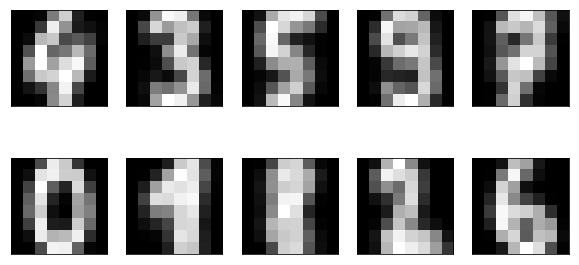

In [10]:
fig = plt.figure(figsize=(10,5))

for i,curcen in enumerate(centroids):
    
    plt.subplot(2,5,i+1)
    im_cen = curcen.reshape((8,8))
    plt.imshow(im_cen,cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])

We are now going to take a look in our reconstructions using our KMeans model.

First we take a sample from each class

In [16]:
### Pick a few random examples 
whichex = np.random.randint(low=0,high=100,size=1) 

X_samp = np.concatenate([x_digits[y_digits==i][whichex] for i in range(10)])

X_quant = KMean_classifier.transform(X_samp)

labels = np.argmin(X_quant,axis=1)
print(X_quant)
print(X_quant.shape)
print(labels)

[[41.2866112  43.03243149 41.13112641 37.08031068 47.6276962  17.33220664
  50.20888097 46.36993292 48.58118188 41.62117978]
 [40.23417806 47.30276444 41.5230723  47.46617153 34.22483299 52.60624069
  40.37819207 19.47207618 40.75431376 47.24246055]
 [52.77612343 34.64274391 41.21955166 40.49865973 45.29214091 45.45939094
  55.10916999 34.77762469 27.54030456 44.34100589]
 [51.14278312 26.01191468 40.97860503 26.82441873 42.16817197 40.69717601
  42.83584371 39.93768763 33.09009051 40.16386178]
 [25.58649257 55.04528447 50.14386447 52.64406367 45.48561459 52.96681602
  39.8343592  39.34010541 54.21048743 45.48159357]
 [36.47271533 38.70599174 24.19061114 35.81940033 31.53853197 36.95638107
  41.35212685 38.72085495 44.95813708 38.33131408]
 [37.29667674 49.88686451 46.75652088 45.21112076 49.08867911 41.1867639
  52.42283806 45.26490639 43.79582274 21.06383734]
 [45.863403   47.978278   44.2813355  47.99897332 27.02532737 54.63988579
  44.27739021 42.88128505 53.64709901 55.61379356]
 

In [26]:
### CELL TO COMPLETE use the transform method from the kmeans object and the argmin method from class numpy
### to generate an array containing the closest centroid to the samples 
### and another array to store the error of reconstructing the samples 

X_errors = X_quant
closest_centroids = centroids[labels]  #Array containing the closest centroid (argmin of error) to the samples
best_errors = [X_quant[i][labels[i]] for i in range(10)]  #Array containing the minimal error for each sample
print(best_errors)

[17.33220663528163, 19.4720761768681, 27.540304564586883, 26.01191468497686, 25.586492571654322, 24.19061113970219, 21.06383733625241, 27.02532736807261, 32.574792520914265, 29.320045390967515]


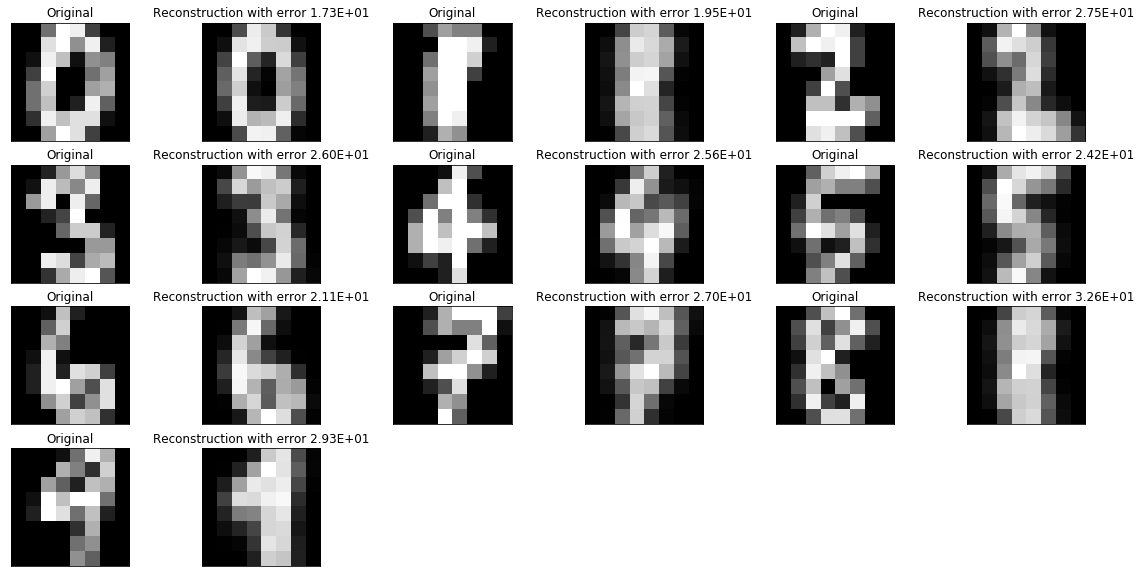

In [27]:
plt.figure(figsize=(20,10))
for i,(im,im_cen,error) in enumerate(zip(X_samp,closest_centroids,best_errors)):
        
    plt.subplot(4,6,1+2*i)
    plt.imshow(im.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original")
    
    plt.subplot(4,6,2+2*i)
    plt.imshow(im_cen.reshape(8,8),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.title("Reconstruction with error %.2E"%error)


Visualize the elbow method with inertia, by generating KMeans with clusters ranging from 1 to 99, using random state = 0. Inertia is stored in [inertia\_](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

100%|██████████| 99/99 [00:35<00:00,  2.80it/s]


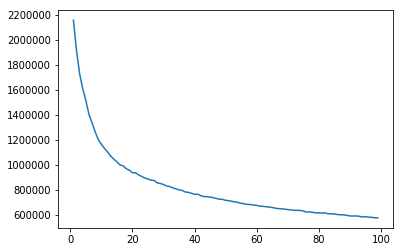

In [29]:
import tqdm
inertias = []
nclust = range(1,100)
### CELL TO COMPLETE, generate a KMeans model with varying n_clusters, fit it to the data 
### and add its inertia to the inertia list
for i in tqdm.tqdm(nclust):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(x_digits)
    inertias.append(kmean.inertia_)
    
plt.plot(nclust,inertias)





Sparse Dictionary Learning  on Digits
--

We are now going to pass to dictionary learning. The first thing is to generate a model using [MiniBatchDictionaryLearning](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html). MiniBatch here means that the method is trained using only a part of the dataset at each time, which helps immensely with the scaling of the method to bigger and wider datasets, but does not guarantee a performance as good as the normal method (where the method see all the dataset at the same time).

Use n_components=$16$, random_state=$0$ and verbose = $10$ to instantiate your object. 

The method [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html#sklearn.decomposition.MiniBatchDictionaryLearning.fit_transform) is more useful than fit in this case, as it returns the code generated by the dictionary.

In [30]:
## CELL TO COMPLETE
dictlearn = MiniBatchDictionaryLearning(n_components=16, random_state=0, verbose = 10)#Instantiate a MiniBatchDictionaryLearning
code = dictlearn.fit_transform(x_digits) #Get the code from fit_transform

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  10 (elapsed time:   0s,  0.0mn)
Iteration  20 (elapsed time:   0s,  0.0mn)
Iteration  30 (elapsed time:   0s,  0.0mn)
Iteration  40 (elapsed time:   0s,  0.0mn)
Iteration  50 (elapsed time:   0s,  0.0mn)
Iteration  60 (elapsed time:   0s,  0.0mn)
Iteration  70 (elapsed time:   0s,  0.0mn)
Iteration  80 (elapsed time:   0s,  0.0mn)
Iteration  90 (elapsed time:   0s,  0.0mn)
Iteration  100 (elapsed time:   0s,  0.0mn)
Iteration  110 (elapsed time:   0s,  0.0mn)
Iteration  120 (elapsed time:   0s,  0.0mn)
Iteration  130 (elapsed time:   0s,  0.0mn)
Iteration  140 (elapsed time:   0s,  0.0mn)
Iteration  150 (elapsed time:   0s,  0.0mn)
Iteration  160 (elapsed time:   1s,  0.0mn)
Iteration  170 (elapsed time:   1s,  0.0mn)
Iteration  180 (elapsed time:   1s,  0.0mn)
Iteration  190 (elapsed time:   1s,  0.0mn)
Iteration  200 (elapsed time:   1s,  0.0mn)
Iteration  210 (elapsed time:   1s,  0.0mn)
Iteration  220 (elapsed time:   1s,  0.0mn

We now retrieve each of the components of the dictionary, and plot them so we can visualize the results

In [35]:
print(code)

[[  0.           0.          -5.08622948 ... -24.14945103   0.
    0.        ]
 [ 31.02977819   0.           6.55731934 ...   0.           0.
    0.        ]
 [ 19.49849765   0.           8.38708713 ...   0.           0.
    0.        ]
 ...
 [ 28.28697615   0.           0.         ...   0.         -16.11327574
    0.        ]
 [  0.           0.           0.         ...   0.         -30.78351366
   -6.75421679]
 [  0.           0.           0.         ...   0.         -23.11794956
   12.69310135]]


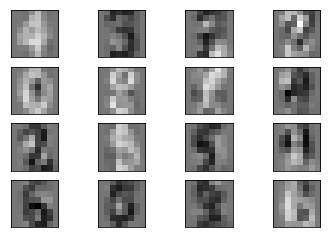

In [31]:
components = dictlearn.components_
fig,axis = plt.subplots(4,4)
for i,d in enumerate(components):
    ax = axis[i//4][i%4]
    ax.imshow(d.reshape((8,8)),cmap=plt.cm.gray,vmin=np.min(components),vmax=np.max(components))
    ax.set_xticks([])
    ax.set_yticks([])

Here we can see that the structure of the digits was kept by the components, which means that the digits are always centered and that the rest is a uniform background. 

Now we want to generate some reconstructions, so first we are going to generate some samples

In [32]:
whichex = np.random.randint(low=0,high=100,size=1) 
samples = list()
indexes = list()
for i in range(10):
    index = np.where(y_digits==i)[0][whichex]
    samples.append(x_digits[index])
    indexes.append(index)
X_samp = np.concatenate(samples)
indexes = np.array(indexes)

In [37]:
print(indexes)
print(components)

[[ 78]
 [ 90]
 [ 84]
 [ 89]
 [110]
 [102]
 [ 88]
 [ 94]
 [122]
 [105]]
[[ 3.58940718e-64  1.23917537e-04 -1.69276779e-02 ...  2.32459840e-02
  -2.71569033e-02 -1.07542700e-02]
 [-2.76930130e-63 -2.88048317e-02 -2.48300292e-01 ... -1.97925509e-01
  -5.53166442e-02 -9.04922149e-03]
 [-1.35197476e-63 -1.69134405e-02 -1.52564179e-01 ...  3.28397146e-01
   1.62275954e-01  4.74914232e-02]
 ...
 [ 4.85145124e-63  2.66053576e-03 -7.68698873e-02 ...  5.90866883e-03
   2.26396985e-03 -1.16400288e-02]
 [ 2.44819085e-63 -1.21038226e-02 -1.92588636e-01 ... -1.23688828e-01
  -8.58591464e-02 -4.35869705e-02]
 [-9.85987851e-64  1.26947489e-02  1.09240580e-01 ...  1.99587599e-01
   1.57698075e-01  1.39687752e-02]]


And now we will use the codes obtained using the dictionary and the indexes used to extract the samples to reconstruct the data by using [np.dot]() function to perform matrix multiplication between the sample code and the components from the dictionary.

In [42]:
### CELL TO COMPLETE, generate the reconstructions array using code, indexes and D
reconstructions = np.dot(code, components)

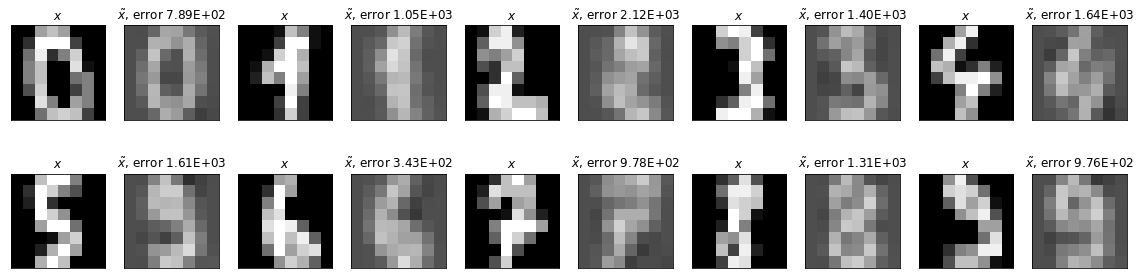

In [43]:
plt.figure(figsize=(20,5))
for plot_index,(digit,reconstruction) in enumerate(zip(X_samp,reconstructions)):
    plt.subplot(2,10,plot_index*2+1)

    plt.imshow(digit.reshape((8,8)),cmap=plt.cm.gray,vmin=x_digits.min(),vmax=x_digits.max())
    plt.xticks([])
    plt.yticks([])
    plt.title('$x$')
        
    plt.subplot(2,10,plot_index*2+2)
    plt.imshow(reconstruction.reshape((8,8)),cmap=plt.cm.gray,vmin=reconstructions.min(),vmax=reconstructions.max())
    plt.xticks([])
    plt.yticks([])
    error = np.sum((reconstruction-digit)**2)
    plt.title('${\~x}$, error %.2E' % error)

# Visualization of manifold learning

One example of the importance of manifold learning, we train a TSNE model and plot the 2D visualization

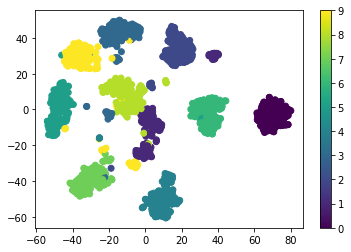

In [44]:
from sklearn.manifold import TSNE
unsup = TSNE(random_state = 0)
examples = unsup.fit_transform(x_digits)
plt.scatter(examples[:,0],examples[:,1],c=y_digits)
plt.colorbar()

Unsupervised learning on pyrat games
--

Now it is your turn. Perform the same analysis we did in the digits dataset on the pyrat dataset you generated for TP1. We are going to be concentrating ourselves only in the games that the python lost (i.e y < 1)

In [ ]:
### CELL TO COMPLETE, load the dataset and stock only the games the python lost in x and y
x = 
y = 

Plot a few configurations of the pyrat dataset. In the first TP (TP0) we made a mistake of representing the labyrinth as (15,21) instead of (21,15). Another mistake we made was not inverting the yaxis, which made that not only our labyrinth was not in the correct aspect ratio it was also inverted. 

In [ ]:
afew = 5
for i in range(afew):
    ind = np.random.randint(x.shape[0])
    plt.imshow(x[ind].reshape((21,15)))
    plt.title('Result : %d' % y[ind])
    plt.gca().invert_yaxis()
    plt.show()

# Mean representation of losses

Do the same experiment as of the end of TP0 by showing the mean representation of the games the python didn't win. This time use the correct values for the aspect ratio of the labyrinth and the correct orientation of the y_axis

In [ ]:
### CELL TO COMPLETE

Now do a visualization of the cluster centroids and reconstructions as we did with digits. Finally try to find the best k by testing different values of n_clusters 

In [ ]:
## CELL TO COMPLETE

In [ ]:
##CELL TO COMPLETE

In [ ]:
## CELL TO COMPLETE


Dictionary Learning on PyRat Games 
--

Generate a MiniBatchDictionaryLearning model of the pyrat dataset. Show the components, the reconstructions and the errors.

In [ ]:
## CELL TO COMPLETE

In [ ]:
## CELL TO COMPLETE

### Now try to analyse the data you have, what are the characteristics that you could find in the games where the python lost? You should now carry on with the analysis on your P2